In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
#url = https://archive.ics.uci.edu/dataset/20/census+income
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
features = census_income.data.features
labels = census_income.data.targets


In [2]:

# Exploratory Data Analysis (EDA)
# Explore the dataset's structure and summary statistics
totalData = pd.concat([features, labels], axis = 1)
print(totalData.head())
print(totalData.shape)

print(totalData.isnull().sum())
print(totalData.nunique())

#clean
totalData = totalData.dropna()
totalData = totalData.replace('>50K.', '>50K')
totalData = totalData.replace('<=50K.', '<=50K')

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

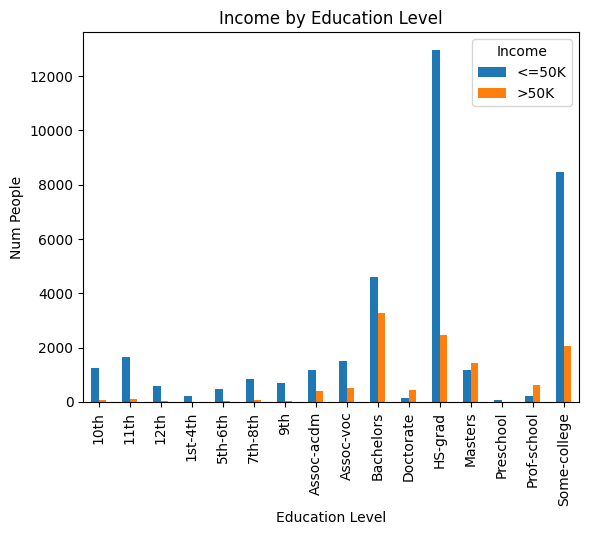

In [3]:
# Visualize key features using plots


#income vs education
educationIncome = totalData.groupby(['education', 'income']).size().unstack()

educationIncome.plot(kind='bar', stacked=False)
plt.title('Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Num People')
plt.legend(title='Income')
plt.show()



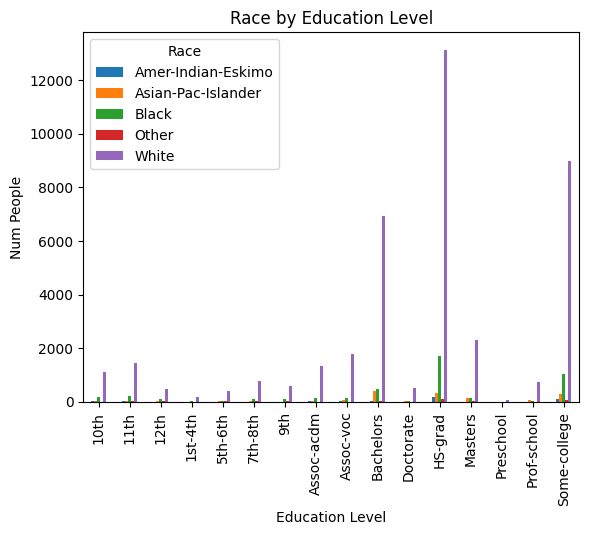

In [4]:
#education by race
educationRace = totalData.groupby(['education', 'race']).size().unstack()

educationRace.plot(kind='bar', stacked=False)
plt.title('Race by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Num People')
plt.legend(title='Race')
plt.show()

In [5]:
#income vs nationality

#this told me absolutely nothing
"""
nationIncome = totalData.groupby(['native-country', 'income']).size().unstack()
nationIncome.plot(kind='bar', stacked=False)
plt.title('Income by Native Country')
plt.xlabel('Native Country')
plt.ylabel('Num People')
plt.legend(title='Income')
plt.show()
"""

"\nnationIncome = totalData.groupby(['native-country', 'income']).size().unstack()\nnationIncome.plot(kind='bar', stacked=False)\nplt.title('Income by Native Country')\nplt.xlabel('Native Country')\nplt.ylabel('Num People')\nplt.legend(title='Income')\nplt.show()\n"

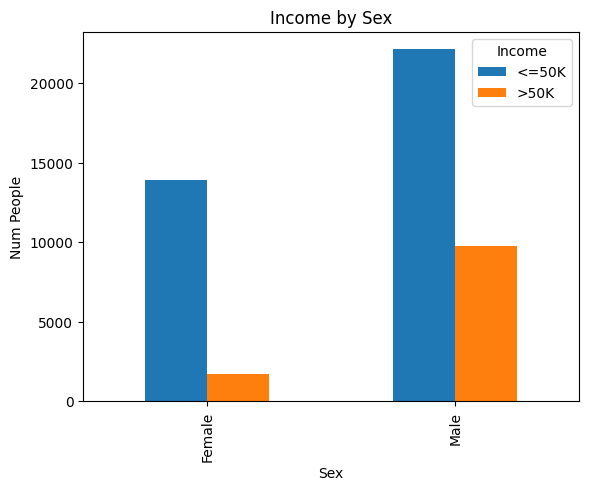

In [6]:
#income vs sex

sexIncome = totalData.groupby(['sex', 'income']).size().unstack()
sexIncome.plot(kind='bar', stacked=False)
plt.title('Income by Sex')
plt.xlabel('Sex')
plt.ylabel('Num People')
plt.legend(title='Income')
plt.show()

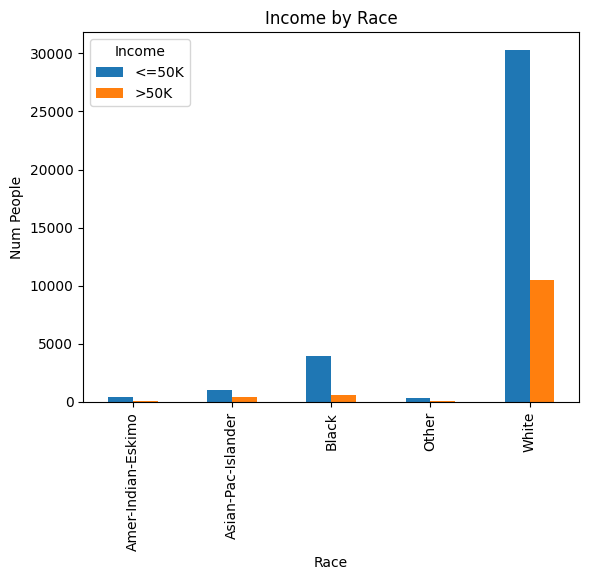

In [7]:
#income vs race
raceIncome = totalData.groupby(['race', 'income']).size().unstack()
raceIncome.plot(kind='bar', stacked=False)
plt.title('Income by Race')
plt.xlabel('Race')
plt.ylabel('Num People')
plt.legend(title='Income')
plt.show()

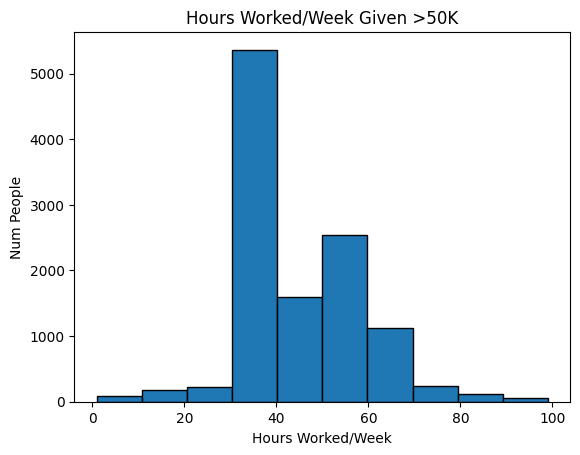

In [8]:
#histogram of hours/week worked given >50k
greater50 = totalData[totalData['income'] == '>50K']

plt.hist(greater50['hours-per-week'], edgecolor='black')
plt.title('Hours Worked/Week Given >50K')
plt.xlabel('Hours Worked/Week')
plt.ylabel('Num People')
plt.show()

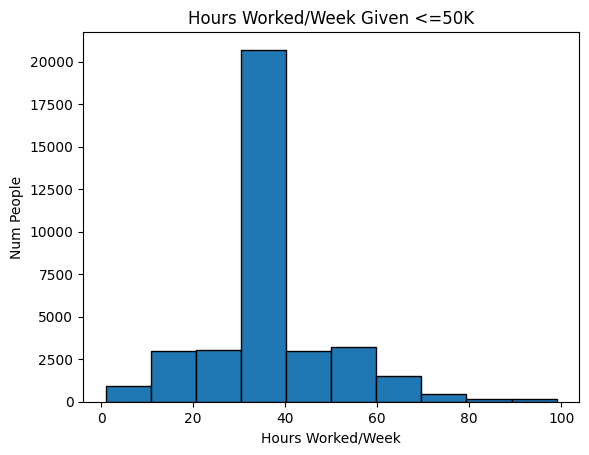

In [9]:
#histogram of hours/week worked given <=50k
lower50 = totalData[totalData['income'] == '<=50K']

plt.hist(lower50['hours-per-week'], edgecolor='black')
plt.title('Hours Worked/Week Given <=50K')
plt.xlabel('Hours Worked/Week')
plt.ylabel('Num People')
plt.show()

In [10]:
# Hypothesis Formulation
# Formulate at least two hypotheses based on what you observe in the visuals

#Hypothesis 1: Higher Income is Correlated with being White
#Hypothesis 2: Higher Income is Correlated with Higher Education

In [11]:
# Hypothesis Testing
# Test the formulated hypotheses using statistical tests or visualizations

from scipy.stats import chi2_contingency
#Hyp 1: Use Chi2 Test
totalData['isWhite'] = totalData['race'].apply(lambda x: 1 if x == 'White' else 0)
contTable = pd.crosstab(totalData['isWhite'], totalData['income'])
chi2, p, dof, expected = chi2_contingency(contTable)

if p < 0.05:
  print("The p value IS statistically significant which means that Being White IS Correlated with a Higher Income")
else:
  print("The p value IS NOT statistically significant which means that Being White IS NOT Correlated with a Higher Income")




The p value IS statistically significant which means that Being White IS Correlated with a Higher Income


In [12]:
#Hyp 2: Use Chi2 Test

#some college not included in higher education as that could mean anything
totalData['higherEducation'] = totalData['education'].apply(lambda x: 1 if x == "Assoc-acdm" or x == "Assoc-voc" or x == "Bachelors" or x == "Doctorate" or x == "Masters" else 0)

contTable2 = pd.crosstab(totalData['higherEducation'], totalData['income'])
chi2, p, dof, expected = chi2_contingency(contTable2)

if p < 0.05:
  print("The p value IS statistically significant which means that Higher Education IS Correlated with a Higher Income")
else:
  print("The p value IS NOT statistically significant which means that Higher Education IS NOT Correlated with a Higher Income")

The p value IS statistically significant which means that Higher Education IS Correlated with a Higher Income


In [ ]:

# Documentation and Reporting
# Document the entire analysis process, including code and explanations
# Summarize key findings in a clear and concise report


**Initial Visualizations:
The first graph is income vs education level. For education levels lower than college, most people tend to have incomes under 50K. Although most people in higher education also mostly have incomes under 50K, there are significantly more people with incomes over 50K.
The second graph is race vs education level. There doesn't seem to be any surface level patterns. Most of the people are white.
The third graph is income by sex. Although most male and female make less than 50K, significantly more men make over 50K than women.
The fourth graph is income by race. More white people make over 50K than other races.
The fifth and sizth graphs show hours worked vs whether a person made over or under 50K.There is no significant difference in the median. However, for people who made over 50K, there is more of a distribution for more hours worked indicating that maybe their high pay is due to higher work hours.

My hypotheses were -> Hypothesis 1: Higher Income is Correlated with being White.
Hypothesis 2: Higher Income is Correlated with Higher Education

Chi2 Tests were performed on both Hypotheses and the results indicated that both Hypotheses were statistically significant with an alpha level of 0.05.
**